# 데이터 정제

데이터는 2013-01-01 부터 2017-08-15 까지 있음

In [21]:
import pandas as pd
data = pd.read_csv('./../data/sales_raw.csv')

data = data[['date','store_nbr','family','sales']]
data.columns = ['ds', 'store_id', 'product_id', 'y']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['product_id'] = encoder.fit_transform(data['product_id'])
data['ds'] = pd.to_datetime(data['ds'], infer_datetime_format=True)
data.to_csv('./../data/sales_modified.csv')

In [3]:
import pandas as pd

data = pd.read_csv('./../data/sales_modified2.csv', index_col=0)
data = data[(data['store_id'] == 1) & (data['product_id'] == 5)]
data

,Unnamed: 0,ds,store_id,product_id,y
5,5,2017-10-26,1,5,0.00000
1787,1787,2017-10-27,1,5,470.65200
3569,3569,2017-10-28,1,5,310.65500
5351,5351,2017-10-29,1,5,198.36600
7133,7133,2017-10-30,1,5,301.05700
...,...,...,...,...,...
2991983,2991983,2022-06-05,1,5,145.60700
2993765,2993765,2022-06-06,1,5,243.22000
2995547,2995547,2022-06-07,1,5,136.67900
2997329,2997329,2022-06-08,1,5,346.03800


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.7218
             ds
0    2017-10-26
1    2017-10-27
2    2017-10-28
3    2017-10-29
4    2017-10-30
...         ...
1686 2022-06-12
1687 2022-06-13
1688 2022-06-14
1689 2022-06-15
1690 2022-06-16

[1691 rows x 1 columns]
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3359.45    0.00289648         91.78      0.8874      0.8874      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       3359.73    0.00132748       141.217   1.022e-05       0.001      160  LS failed, Hessian reset 
     140        3360.3   0.000328318        120.42   5.109e-06       0.001      249  LS failed, Hessian reset 
     189       3360.42   5.99977e-08       51.8987     0.06015           1      324   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


             ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2017-10-26  249.674345  154.506518  312.046930   249.674345   249.674345   
1    2017-10-27  249.779565  225.146739  378.831910   249.779565   249.779565   
2    2017-10-28  249.884784  163.110709  325.192833   249.884784   249.884784   
3    2017-10-29  249.990004  184.638213  331.752283   249.990004   249.990004   
4    2017-10-30  250.095224  168.623766  330.584641   250.095224   250.095224   
...         ...         ...         ...         ...          ...          ...   
1686 2022-06-12  351.769289  279.021925  434.530136   351.769289   351.769289   
1687 2022-06-13  351.657863  267.882348  423.754358   351.657863   351.657863   
1688 2022-06-14  351.546437   66.765899  220.499350   351.546437   351.546437   
1689 2022-06-15  351.435010  295.935380  447.867909   351.435010   351.435010   
1690 2022-06-16  351.323584  271.710721  430.095536   351.323584   351.323584   

      additive_terms  addit

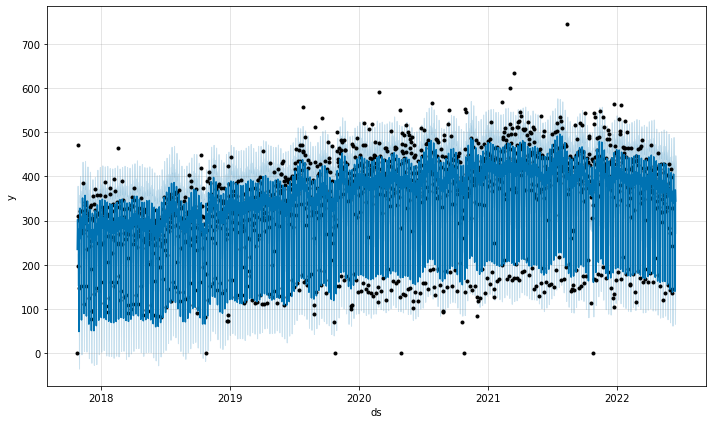

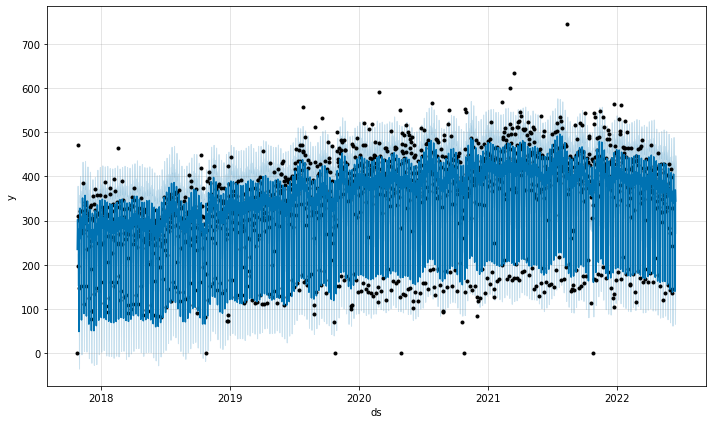

In [4]:
from prophet import Prophet

prophet = Prophet()
prophet.fit(data)

future = prophet.make_future_dataframe(periods=7, freq='D',include_history=True)
print(future)
forecast = prophet.predict(future)
# print(forecast[['ds', 'yhat','yhat_lower','yhat_upper']])
print(forecast)
print(sum(forecast['yhat']))
prophet.plot(forecast)

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


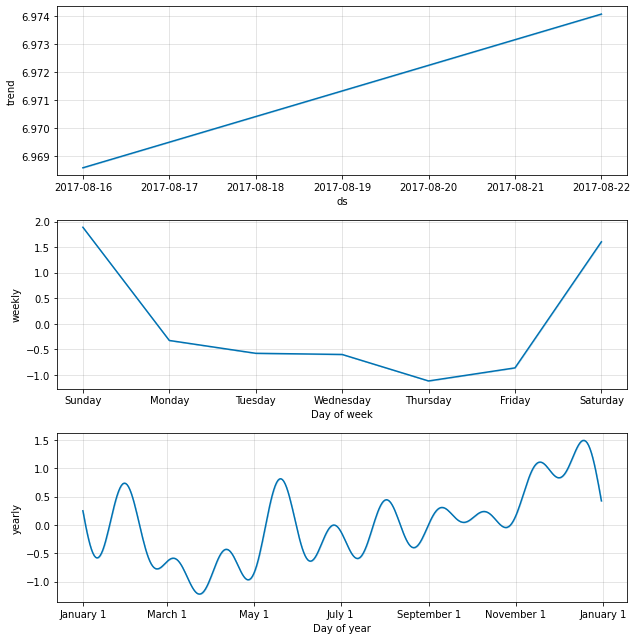

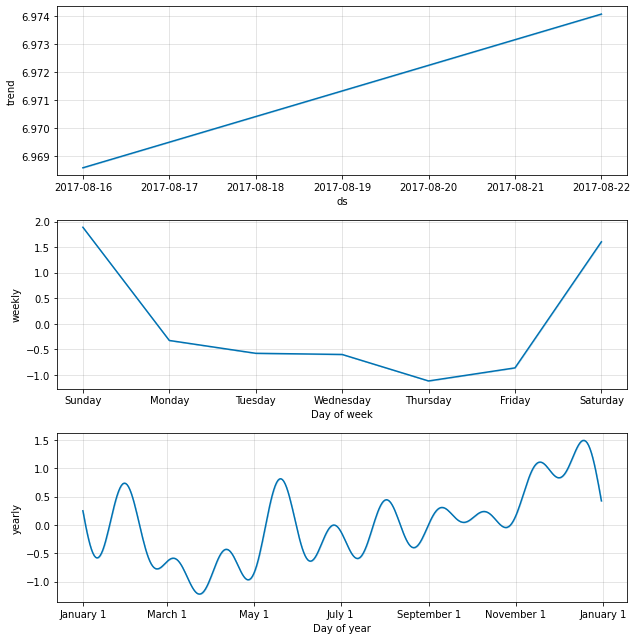

In [9]:
prophet.plot_components(forecast)